In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Read in csv file
input_file = 'resources/Mia_objects_country.csv'
df = pd.read_csv(input_file, index_col='Unnamed: 0')

df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accession_number,artist,classification,continent,country,creditline,culture,dated,department,id,...,style,title,RBL,RB,X,loan,accession_year,country_cleaned,country_status,tableau_country
0,10.1,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c.1888-89,Prints and Drawings,0,...,19th century,"Air, from the series The Four Elements",NaN,NaN,NaN,NaN,10,England,clear,United Kingdom
1,10.2,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,1,...,19th century,"Earth, from the series The Four Elements",NaN,NaN,NaN,NaN,10,England,clear,United Kingdom
2,10.3,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,2,...,19th century,"Fire, from the series The Four Elements",NaN,NaN,NaN,NaN,10,England,clear,United Kingdom
3,10.4,Frederick G. Smith; Artist: Formerly attribute...,Drawings,Europe,England,"Gift of Mrs. C. J. Martin, in memory of Charle...",NaN,c. 1888-89,Prints and Drawings,3,...,19th century,"Water, from the series The Four Elements",NaN,NaN,NaN,NaN,10,England,clear,United Kingdom
4,13.29,Walter Shirlaw,Drawings,North America,United States,Gift of Mrs. Florence M. Shirlaw,NaN,19th century,Prints and Drawings,4,...,19th century,Montana Indian Reservation I,NaN,NaN,NaN,NaN,13,United States,clear,United States


# Data Analysis

## Object Information
- How many objects are in Mia's collection?
- How many lent? RBL/RB/X?

In [17]:
# Check for loaned, RBL, X objects
num_objects = len(df.id)
print('Objects: ' + str(num_objects))
num_lent = df.loan.value_counts()
print(num_lent)
num_RBL = df.RBL.value_counts()
print(num_RBL)
num_RB = df.RB.value_counts()
print(num_RB)
num_X = df.X.value_counts()
print(num_X)

Objects: 123686
L    25214
Name: loan, dtype: int64
RBL    916
Name: RBL, dtype: int64
RB    1898
Name: RB, dtype: int64
X    1667
Name: X, dtype: int64


In [ ]:
# Pie chart of objects by L/RBL/RB/X (?)

In [35]:
# Filter out loaned, RBL, X objects
df_nonLoan = df.loc[(df['loan'] != "L") & (df_nonLoan['RB'] != "RB") & (df_nonRB['X'] != 'X')]

In [63]:
# Filter out 'unclear multiple' and 'unclear possible' countries
country_filter = ['unclear_multiple', 'unclear_possible', 'unclear_continent']
data = df_nonLoan.loc[~df_nonLoan['country_status'].isin(country_filter)]

## Country Breakdown
- How many countries are in Mia's collection?
- Which country accounts for the most objects, the least?
- What is the median number of gifts per country?
- What kinds of bins can break down the numbers to best filter the data?


In [37]:
# Group dataframe by country
collection_country = data.groupby(['country_cleaned'], as_index=False)['accession_number'].count().rename(columns = {'accession_number':'count_objects'})
collection_country.head()

,country_cleaned,count_objects
0,Admiralty Islands,2
1,Afghanistan,39
2,Albania,1
3,Algeria,9
4,Angola,20


In [61]:
# Number of countries
print('Countries: ' + str(len(collection_country)))

# Most and least values
print('Most objects: ' + str(collection_country.count_objects.max()))
print('Least objects: ' + str(collection_country.count_objects.min()))
print('Median objects: ' + str(collection_country.count_objects.median()))

Countries: 181
Most objects: 27221
Least objects: 1
Median objects: 12.0


In [72]:
# Pull out top 8 countries for gifts
collection_country.sort_values('count_objects', ascending=False).reset_index(drop=True).head(8)

,country_cleaned,count_objects
0,United States,27221
1,France,17012
2,Japan,8906
3,England,7936
4,China,7866
5,Germany,3662
6,Italy,2893
7,Netherlands,1732


In [ ]:
# Split data into bins for visualization purposes

# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# plt.hist(ny.price, bins=100, range=(0, 1000))

In [ ]:
# Add column with an aggregate "other" to pull all countries under a 
    # certain number into one group to clean up graphing

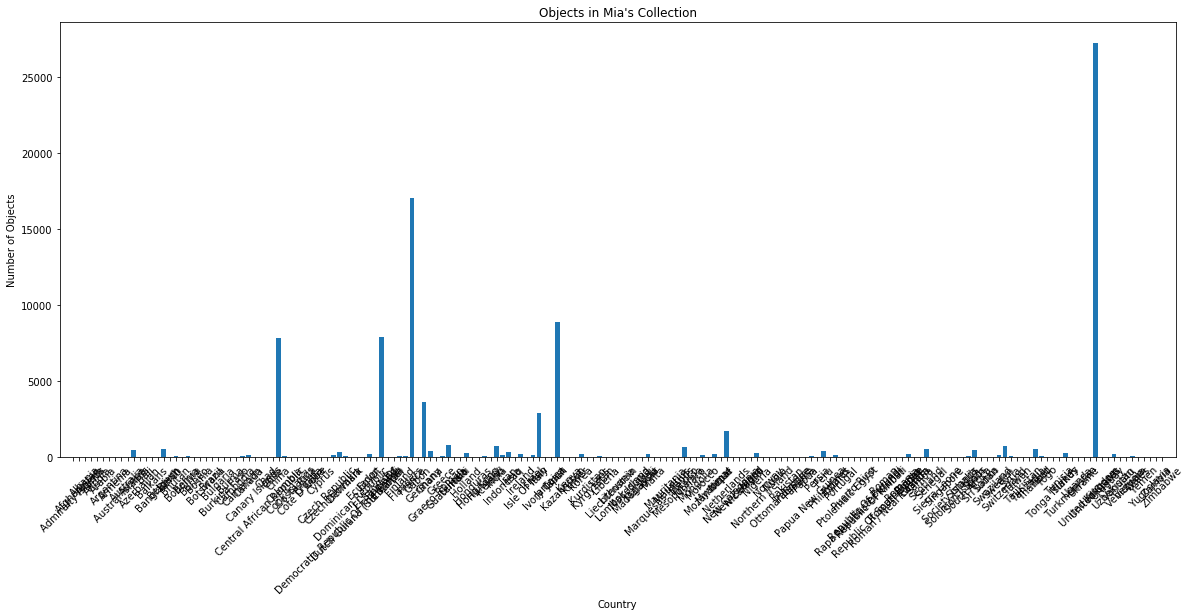

In [71]:
##### Change to pie chart
# Create handles from country values
handles = collection_country['country_cleaned'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, collection_country['count_objects'])
plt.margins(x=0.01)
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects in Mia's Collection")
plt.xlabel("Country")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Tumor_Growth.png")


# Show the Figure
plt.show()

# Data Analysis

## Year Breakdown
- In which year were the most objects gifted, the least?
- What is the median number of gifts per year?
- What years were important for Mia in terms of large gifts?

In [73]:
# Group dataframe by year
collection_year = data.groupby(['accession_year'], as_index=False)['accession_number'].count().rename(columns = {'accession_number':'count_objects'})
collection_year.head()


,accession_year,count_objects
0,6,2
1,8,2
2,9,105
3,10,5
4,11,2


In [74]:
# Most and least values
most_y = collection_year.count_objects.max()
least_y = collection_year.count_objects.min()
median_y = collection_year.count_objects.median()

print(str(most_y) + ", " + str(least_y) + ', ' + str(median_y))

8013, 2, 498.0


In [76]:
# Pull out all years with more than 498 objects
most_df = collection_year[collection_year['count_objects'] > 498]
most_df.count()

accession_year    56
count_objects     56
dtype: int64

Text(0, 0.5, 'Number of Objects')

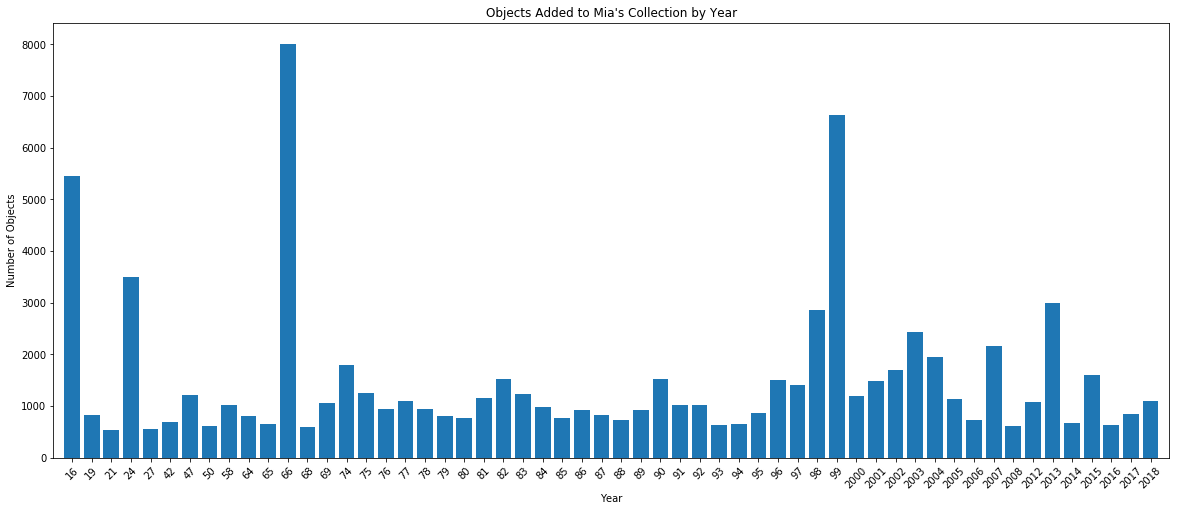

In [77]:
# Create handles from accession_year values
handles = most_df['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, most_df['count_objects'])
plt.margins(x=0.01)
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

In [79]:
# Pull out all years with less than 552 objects
least_df = collection_year[collection_year['count_objects'] < 498]
least_df.count()

accession_year    56
count_objects     56
dtype: int64

Text(0, 0.5, 'Number of Objects')

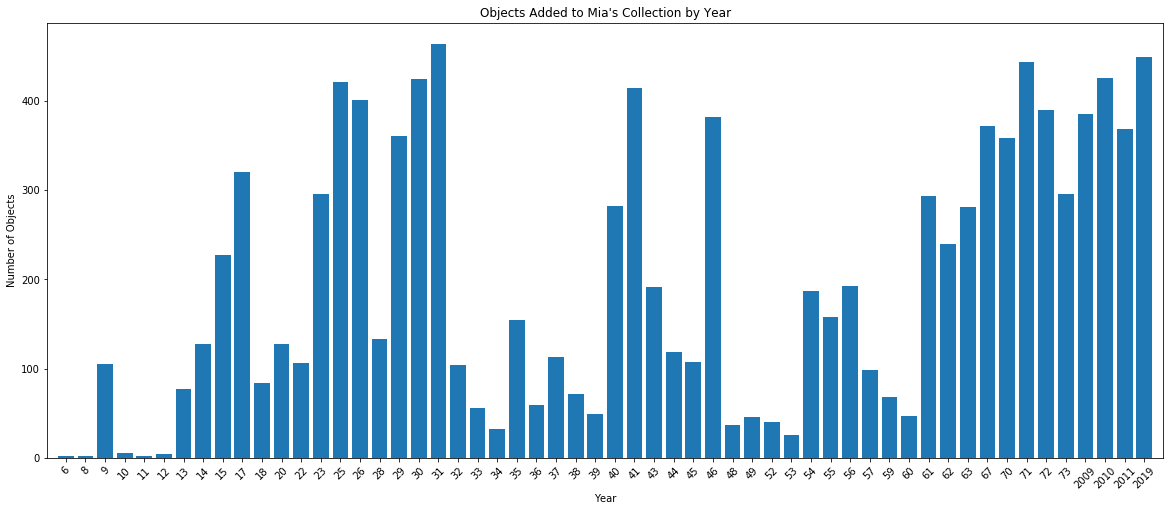

In [80]:
# Create handles from accession_year values
handles = least_df['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, least_df['count_objects'])
plt.margins(x=0.01)
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

In [81]:
# Pull out top 10 years for gifts
collection_year.sort_values('count_objects', ascending=False).head(10)

,accession_year,count_objects
59,66,8013
92,99,6637
9,16,5456
17,24,3491
106,2013,3000
91,98,2854
96,2003,2434
100,2007,2163
97,2004,1942
67,74,1792


# Data Visualization

- How many objects are gifted per year
- How many objects are from each country
- See how the number of objects by country changes over time

In [3]:
collection_year = data.groupby(['accession_year'], as_index=False)['accession_number'].count()
collection_year.head()

,accession_year,accession_number
0,6,2
1,8,2
2,9,105
3,10,5
4,11,2


In [23]:
len(collection_year['accession_year'].values)

113

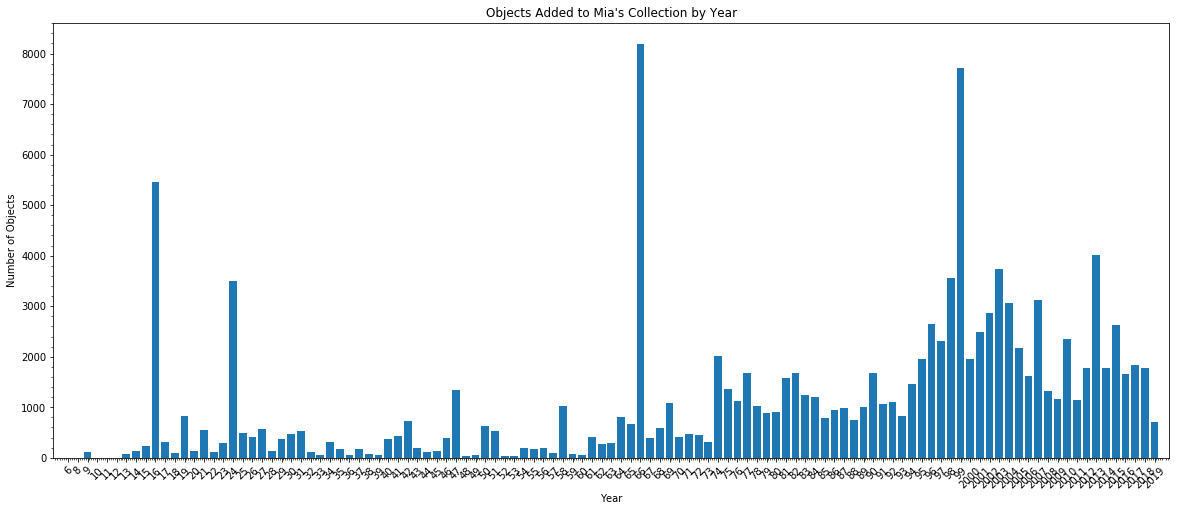

In [25]:
# Create handles from accession_year values
handles = collection_year['accession_year'].values

# Build the bar chart
plt.figure(figsize=(20,8))
x_axis = np.arange(0,len(handles))

plt.bar(x_axis, collection_year['accession_number'])
plt.margins(x=0.01)
plt.minorticks_on()
plt.xticks(x_axis, labels=handles, rotation=45)
plt.title("Objects Added to Mia's Collection by Year")
plt.xlabel("Year")
plt.ylabel('Number of Objects')

# # Save the Figure
# plt.savefig("Collection_by_Year.png")


# Show the Figure
plt.show()